In [62]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

#Read the data

data = pd.read_csv('movies.csv', encoding = 'ISO-8859-1')

In [52]:
data.head(20)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [53]:
#Checking for null values is data set

for i in data.columns:
    percent_missing = np.mean(data[i].isnull())
    print(f'{i}: {percent_missing}%')

budget: 0.0%
company: 0.0%
country: 0.0%
director: 0.0%
genre: 0.0%
gross: 0.0%
name: 0.0%
rating: 0.0%
released: 0.0%
runtime: 0.0%
score: 0.0%
star: 0.0%
votes: 0.0%
writer: 0.0%
year: 0.0%


In [54]:
#Data types in columns

data.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [63]:
#Converting budget and gross columns variables from float to integer

data['budget'] = data['budget'].astype('int64')
data['gross'] = data['gross'].astype('int64')

print(data.dtypes)
data.head()

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [64]:
#Using the year from 'released' column for creating a new column

data['yearcorrect'] = data['released'].astype(str).str[:4]
data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [65]:
data = data.sort_values(by = ['gross'], ascending = False, inplace = False)

In [81]:
pd.set_option('display.max_rows', None)
data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


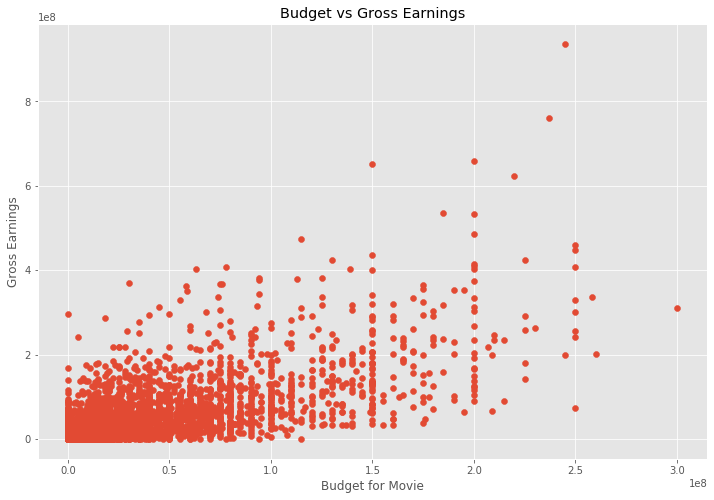

In [20]:
#Visualizing Budget and Gross relationship

plt.scatter(x = data['budget'], y = data['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Movie')
plt.ylabel('Gross Earnings')
plt.show()

In [17]:
data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000.0,Lucasfilm,USA,J.J. Abrams,Action,936662225.0,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000.0,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625.0,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302.0,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000.0,Universal Pictures,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000.0,Marvel Studios,USA,Joss Whedon,Action,623357910.0,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012


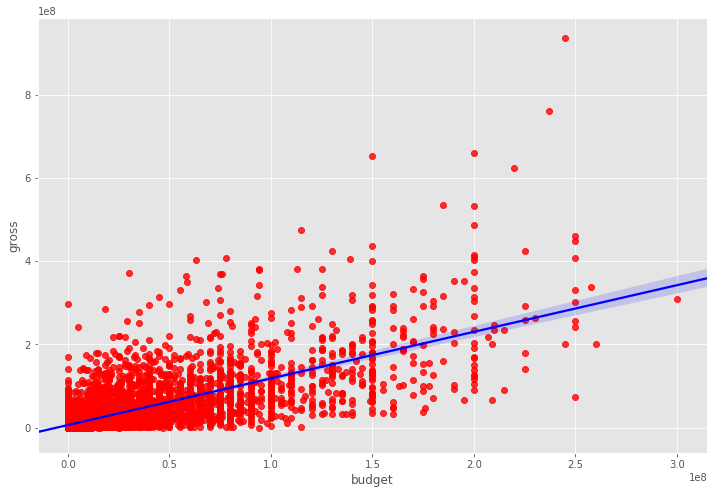

In [22]:
#Plotting Budget vs Gross Earnings using seaborn

sns.regplot(x = 'budget', y = 'gross', data = data, scatter_kws = {'color': 'red'}, line_kws={'color':'blue'})


In [23]:
#Looking at correlation between variables

data.corr() #pearson kendall spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


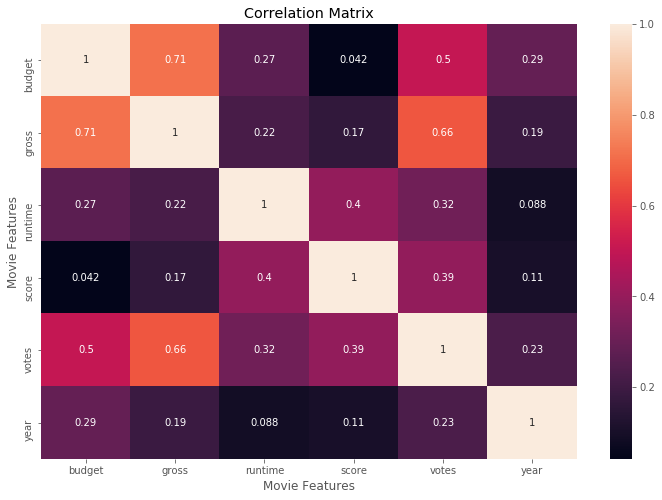

In [42]:
corr_matrix = data.corr()

ax = sns.heatmap(corr_matrix, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [80]:
#Turning relelvant data into categorical data

data_categorical = data.copy(deep=True)

for col in data_categorical.columns[:len(data_categorical.columns)-1]:
    if(data_categorical[col].dtype == 'object'):
        data_categorical[col] = data_categorical[col].astype('category')
        data_categorical[col] = data_categorical[col].cat.codes
        
data_categorical.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,2015
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,2009
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,1997
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,2015
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,2012


In [67]:
data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


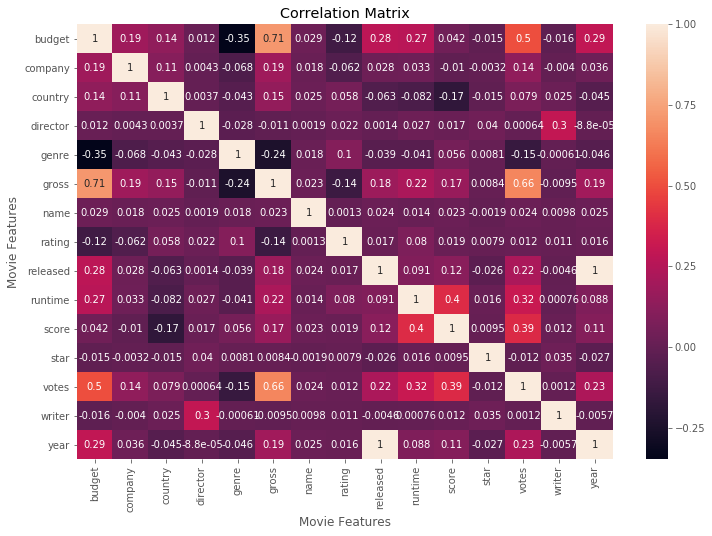

In [73]:
corr_matrix = data_categorical.corr()

ax = sns.heatmap(corr_matrix, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [74]:
data_categorical.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015061,0.503924,-0.015611,0.291009
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272
country,0.137635,0.107950,1.000000,0.003698,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014566,0.078657,0.024981,-0.045204
director,0.011602,0.004320,0.003698,1.000000,-0.027668,-0.011429,0.001905,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000088
genre,-0.346794,-0.068330,-0.042793,-0.027668,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008382,0.662457,-0.009455,0.191548
name,0.028712,0.018098,0.025020,0.001905,0.018062,0.022768,1.000000,0.001288,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001288,1.000000,0.016696,0.079542,0.019271,0.007893,0.011678,0.010740,0.016221
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025504,0.221736,-0.004635,0.996187
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639


In [77]:
corr_mat = data_categorical.corr()

corr_pairs = corr_mat.unstack()

corr_pairs

budget    budget      1.000000
          company     0.187205
          country     0.137635
          director    0.011602
          genre      -0.346794
          gross       0.712196
          name        0.028712
          rating     -0.119660
          released    0.276635
          runtime     0.268226
          score       0.042145
          star       -0.015061
          votes       0.503924
          writer     -0.015611
          year        0.291009
company   budget      0.187205
          company     1.000000
          country     0.107950
          director    0.004320
          genre      -0.068330
          gross       0.187220
          name        0.018098
          rating     -0.062250
          released    0.027898
          runtime     0.033058
          score      -0.010426
          star       -0.003160
          votes       0.138662
          writer     -0.004032
          year        0.036272
country   budget      0.137635
          company     0.107950
        

In [78]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.346794
genre     budget     -0.346794
          gross      -0.242676
gross     genre      -0.242676
country   score      -0.174414
score     country    -0.174414
votes     genre      -0.150519
genre     votes      -0.150519
rating    gross      -0.135538
gross     rating     -0.135538
rating    budget     -0.119660
budget    rating     -0.119660
runtime   country    -0.081796
country   runtime    -0.081796
genre     company    -0.068330
company   genre      -0.068330
country   released   -0.062609
released  country    -0.062609
company   rating     -0.062250
rating    company    -0.062250
genre     year       -0.046259
year      genre      -0.046259
country   year       -0.045204
year      country    -0.045204
country   genre      -0.042793
genre     country    -0.042793
runtime   genre      -0.041357
genre     runtime    -0.041357
          released   -0.039179
released  genre      -0.039179
director  genre      -0.027668
genre     director   -0.027668
year    

In [79]:
high_corr = sorted_pairs[sorted_pairs > .5]
high_corr

votes     budget      0.503924
budget    votes       0.503924
votes     gross       0.662457
gross     votes       0.662457
budget    gross       0.712196
gross     budget      0.712196
released  year        0.996187
year      released    0.996187
budget    budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64